In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import doc_tool
import db_helper
import re
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import n2v as N2V
import utils
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
PROJECT_PATH='/home/hmenn/Workspace/CSE496_Node2Vec_2018'

In [29]:
import gc
gc.collect()

51279

** Load Friendships from database **

In [44]:
#db = db_helper.DBHelper()
#db.connect(user="root",passwd="Hasan5695*",db="cse496")

** Load from json file **

In [8]:
allFriendships = db_helper.getAllFriendsFromJson(PROJECT_PATH+'/dataset/SocialMediaDataset/friends.json')
print("Total Friendship Number:", len(allFriendships))

Total Friendship Number: 2772


In [12]:
%%time
# create friendship graph
friendshipGraph=nx.Graph()

#trace data
for item in allFriendships[:50]:
        friendshipGraph.add_edge(item["UserID"], item["FriendID"],weight=1.0)
print("# of edges:",friendshipGraph.number_of_edges())
print("# of nodes:",friendshipGraph.number_of_nodes())

# of edges: 50
# of nodes: 51
CPU times: user 369 µs, sys: 58 µs, total: 427 µs
Wall time: 330 µs


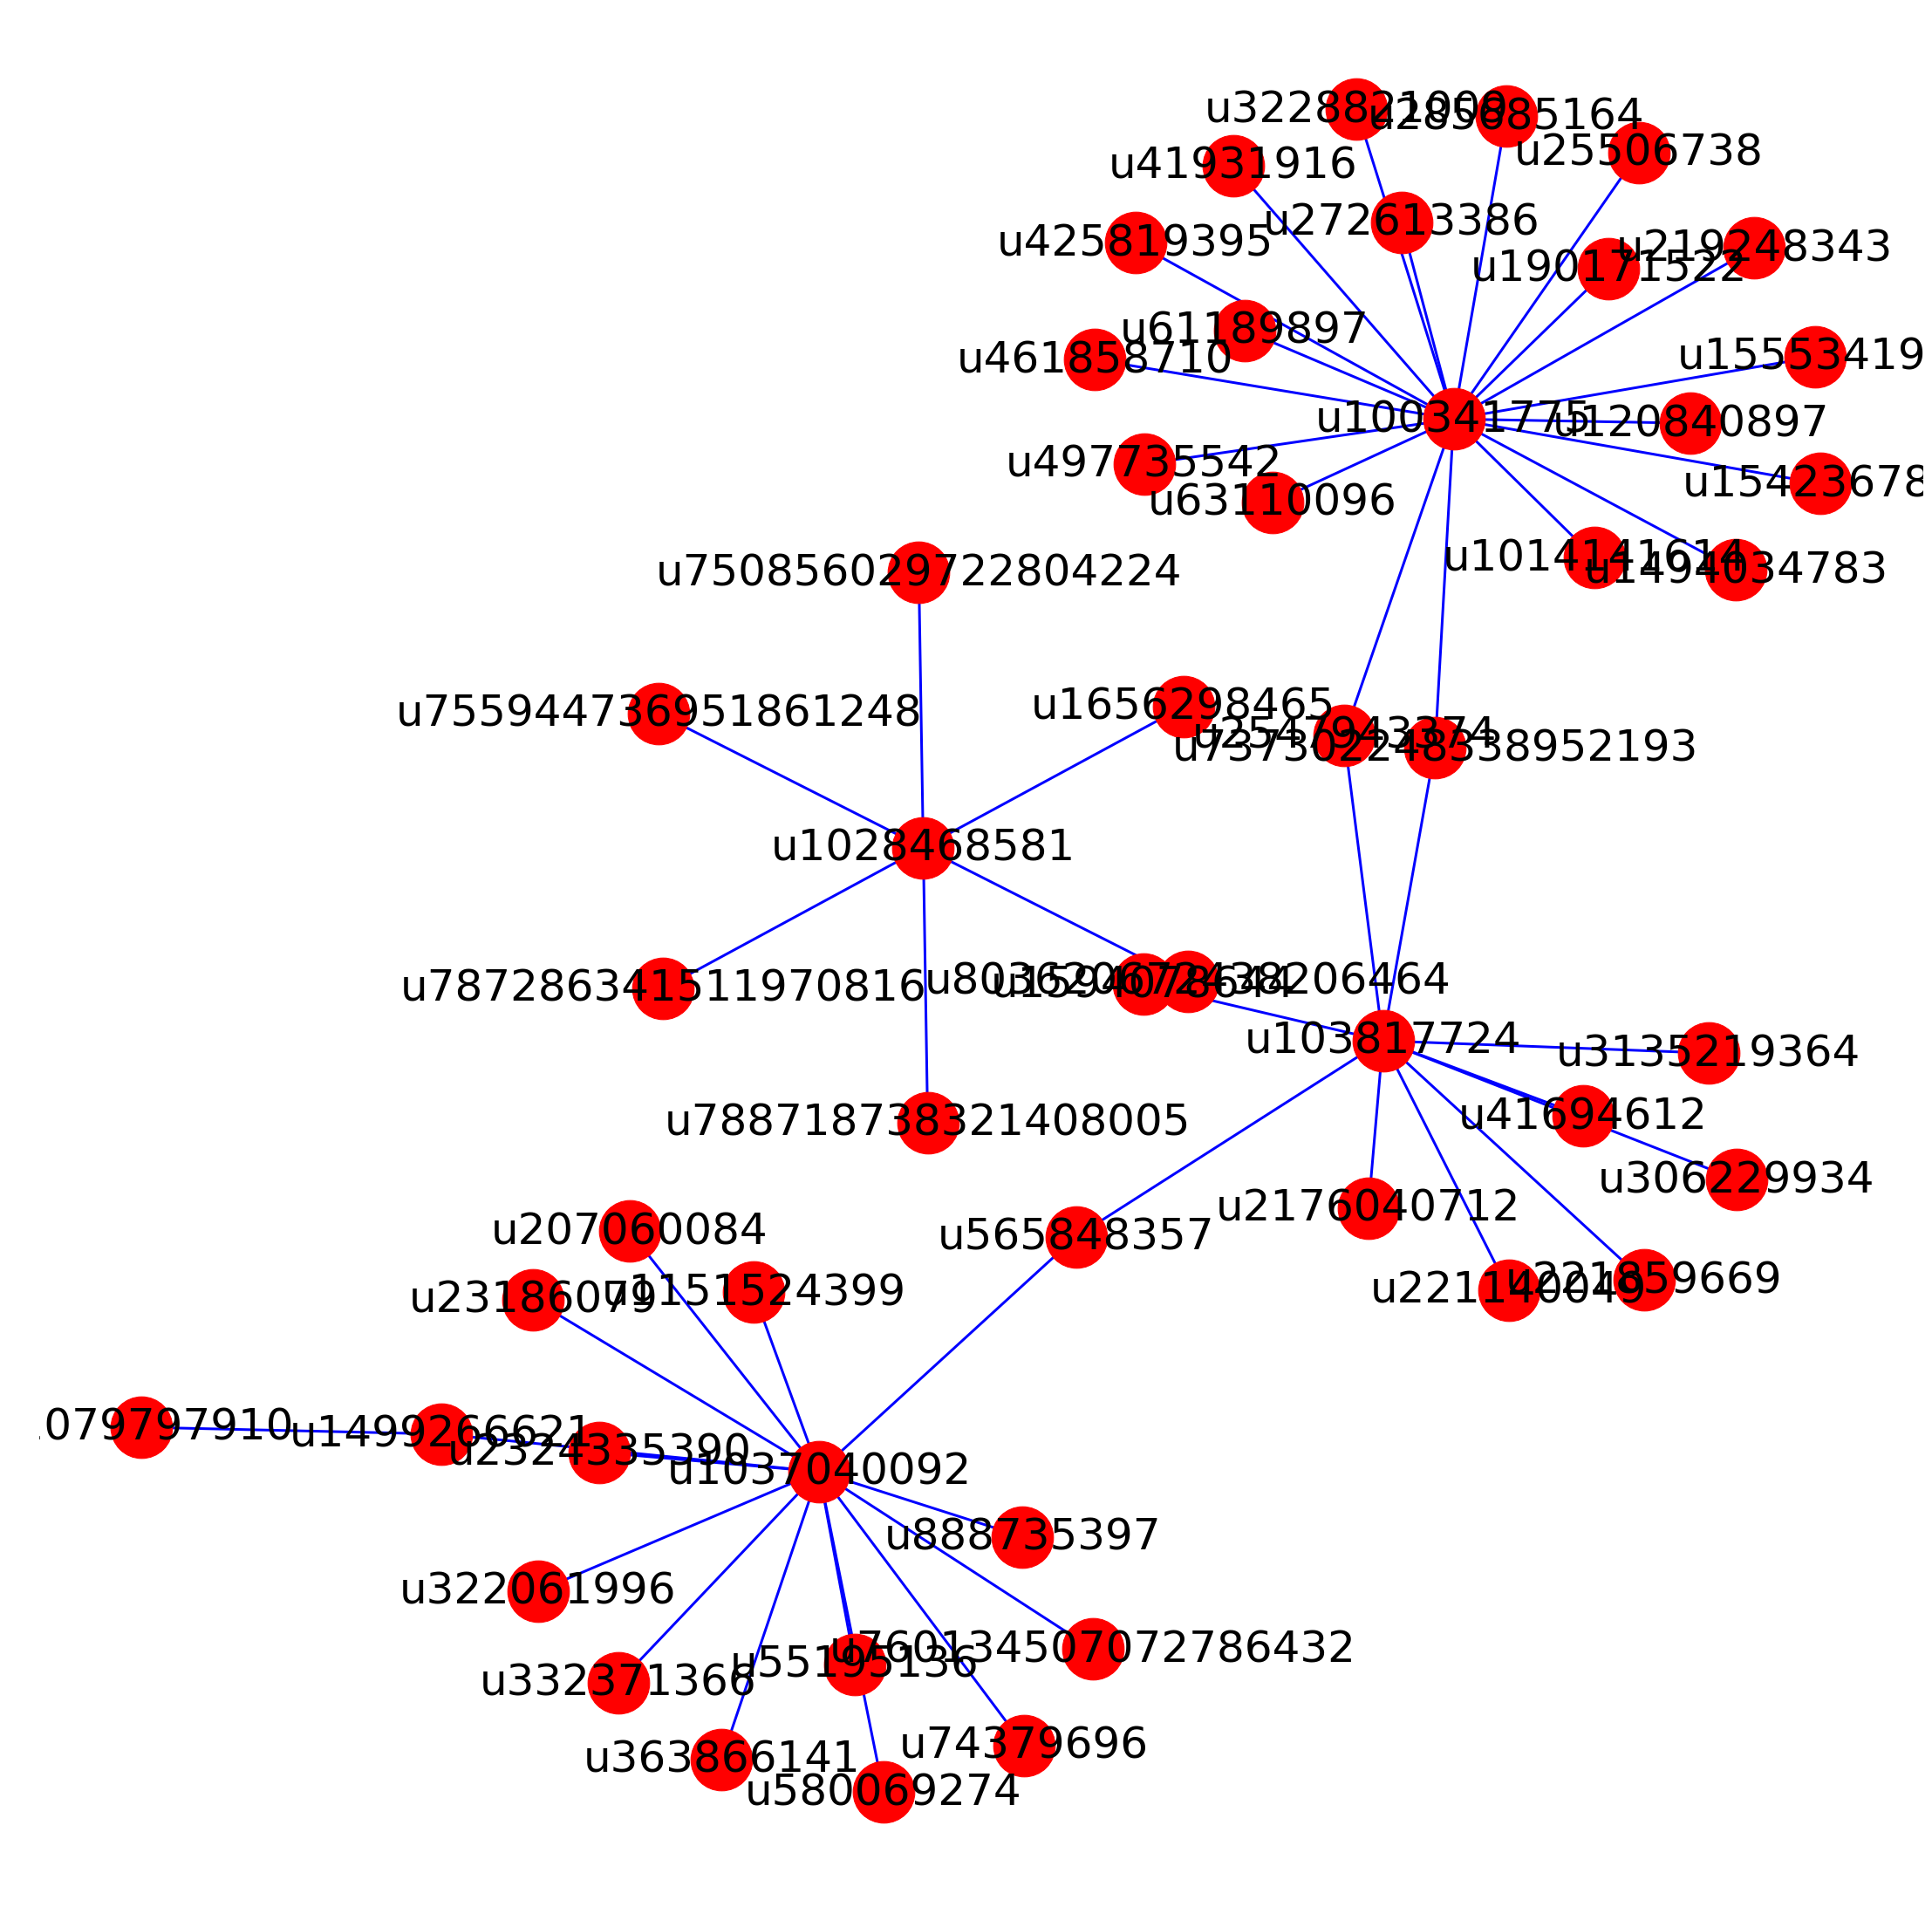

CPU times: user 2.15 s, sys: 387 ms, total: 2.53 s
Wall time: 2.04 s


In [13]:
%%time
plt.figure(1, figsize=(30,30))
nx.draw_kamada_kawai(friendshipGraph,node_size=5000,font_size=50,with_labels=True, width=3, edge_color="b", arrows=True, arrowsize=30)
plt.savefig(PROJECT_PATH+"/outputs/friendships.pdf")
plt.show()

In [23]:
%%time
G = N2V.Graph(friendshipGraph, is_directed=False, p=1.0, q=1.0)
G.preprocess_transition_probs()
walks = G.simulate_walks(1000,80)
model = N2V.learn_embeddings(walks,"friendships")

Walk iteration:
1000 / 1000


In [34]:
#model.wv.most_similar("1055499439")
column_names = ['u1037040092','u1499266621','u565848357','u103817724','u1028468581','u272613386']
matrix1 = np.stack((model.wv[column_names]))
cosines1 = cosine_similarity(matrix1)
df1 = pd.DataFrame(cosines1, columns=column_names, index=column_names)
df1

,u1037040092,u1499266621,u565848357,u103817724,u1028468581,u272613386
u1037040092,1.000000,0.868381,0.799534,0.504842,0.233635,0.213844
u1499266621,0.868381,1.000000,0.714331,0.436249,0.230534,0.201643
u565848357,0.799534,0.714331,1.000000,0.769533,0.107090,0.417349
u103817724,0.504842,0.436249,0.769533,1.000000,0.102864,0.584982
u1028468581,0.233635,0.230534,0.107090,0.102864,1.000000,0.253774
u272613386,0.213844,0.201643,0.417349,0.584982,0.253774,1.000000


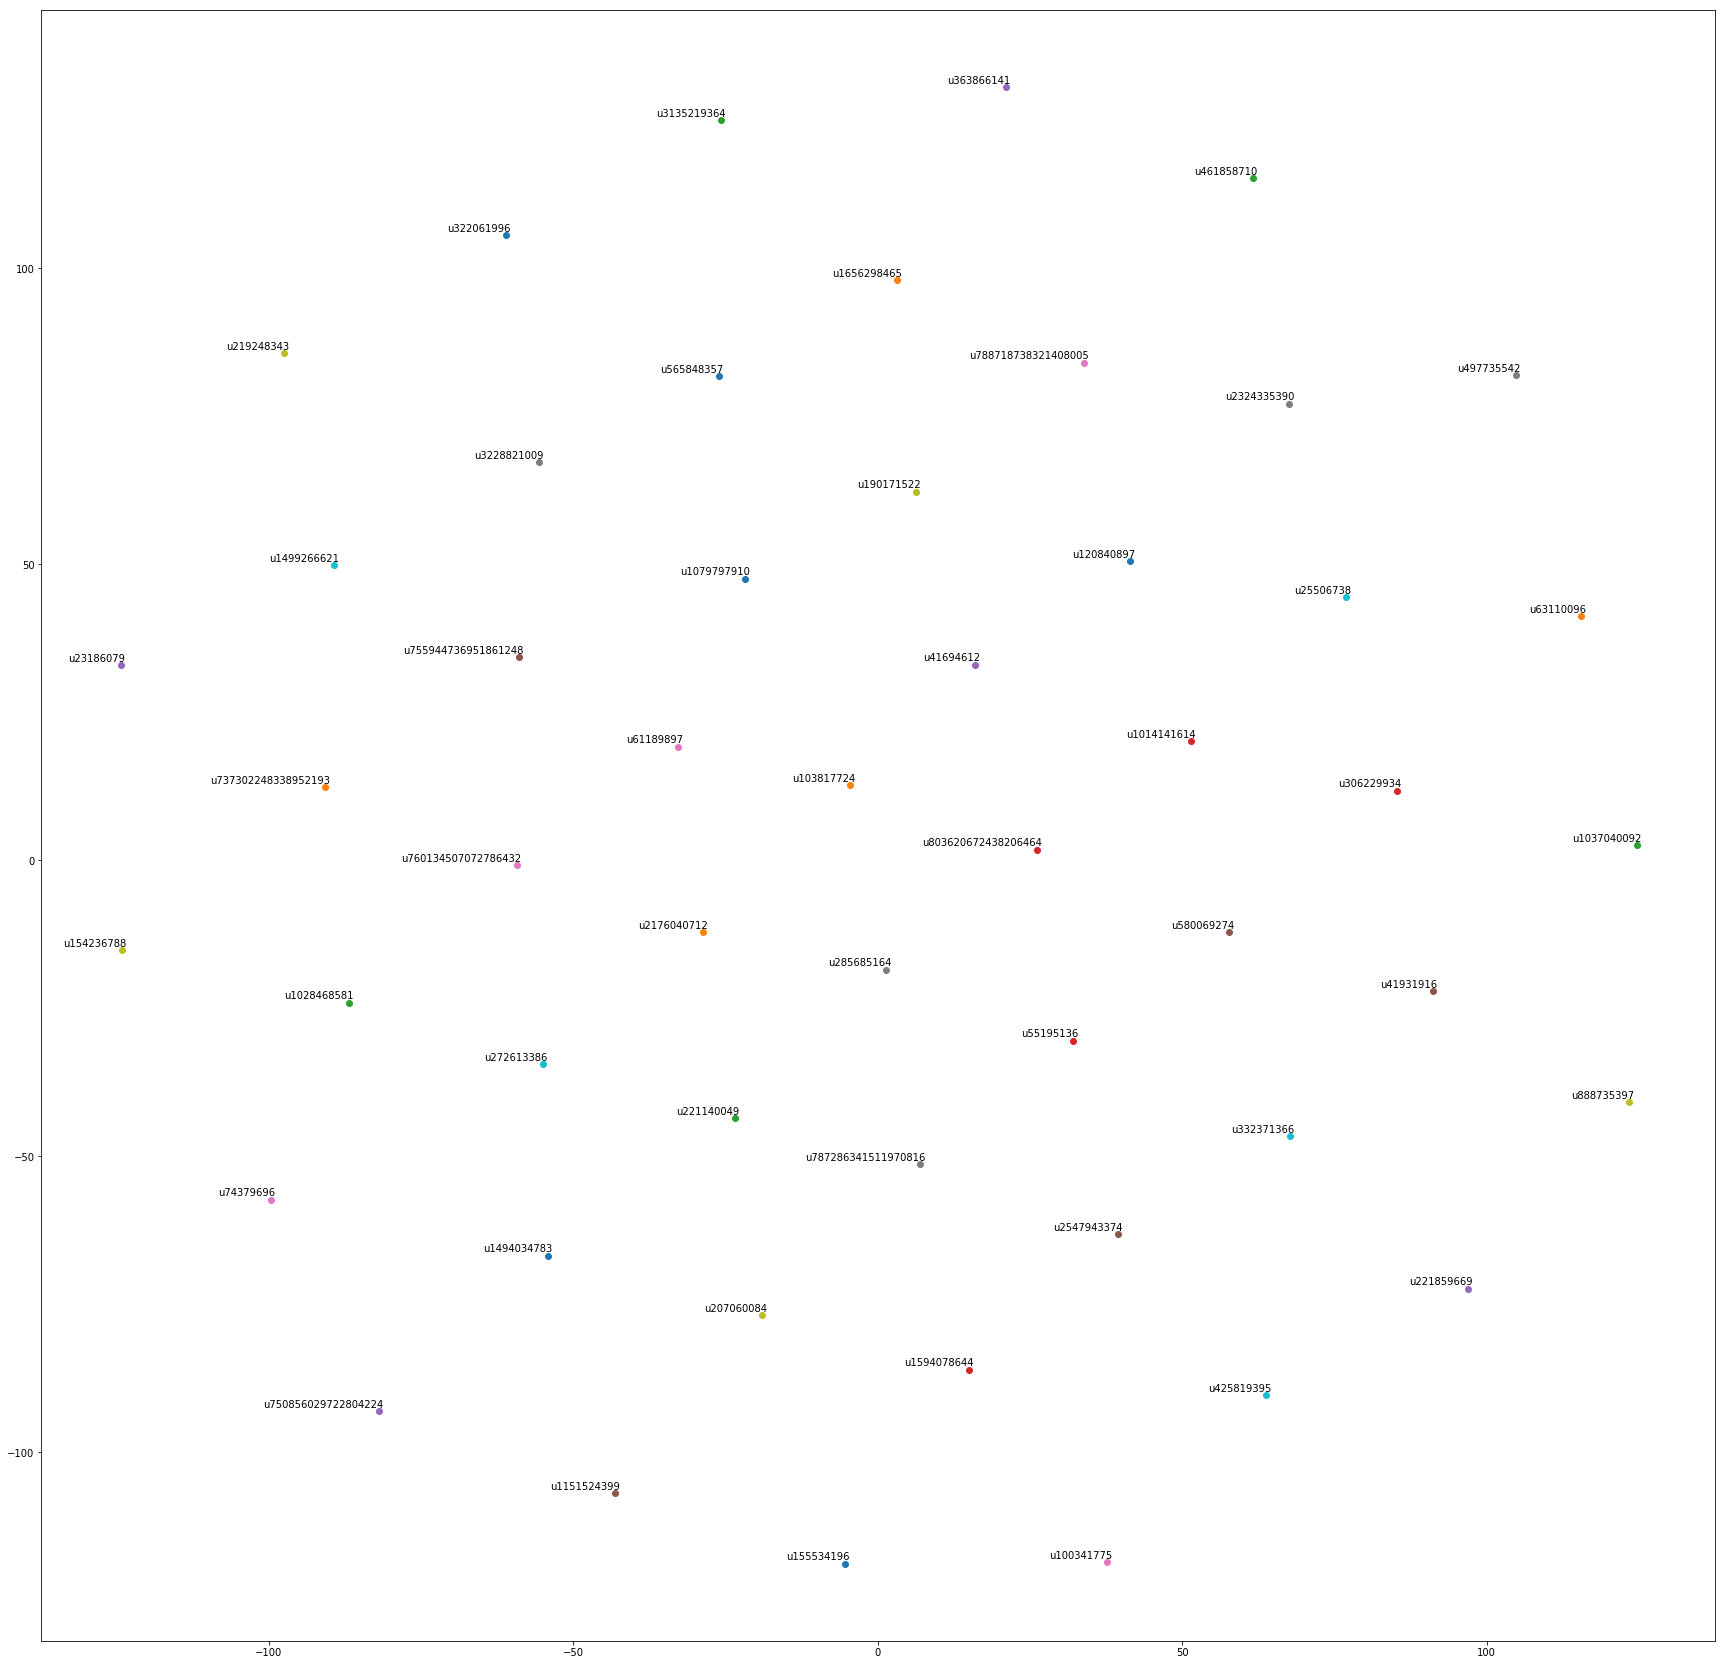

In [35]:
utils.draw_tsne(model, fig_size=(30,30))